#  **A NEURAL NETWORK THAT READ HANDWRITING**

## **EXECUTED BY GODSPOWER UYANGA**

# **PROBLEM STATEMENT**

**We Will Build A Neural Network In Deep Learning That Is able to Classify MNIST Handwritten Digits Using TensorFlow and Convolutional Neural Network CNN.This Trained Neural Network Should be Able To Tell You What The Images Are When  The Trained Neural Network Is Fit With A New Image**

# **WORK FLOW**
- **IMAGE DATA COLLECTION**
- **IMAGE PROCESSING**
- **IMAGE TRAINING TESTING AND SPLITING**
- **TRAIN NEURAL NETWORK**
- **FIT WITH NEW IMAGE**
- **BUILDING PREDICTIVE SYSTEM**
- **PREDICTION AND CLASSIFICATION**

## **IMPORTING DEPENDENCIES**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

## Loading the MNIST data from keras.datasets

In [2]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

### Check Type

In [3]:
type(X_train)

numpy.ndarray

### Check Shape

In [4]:
X_train.shape, X_test.shape, Y_test.shape, Y_train.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (60000,))

In [5]:
# Printing the 10 Images

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


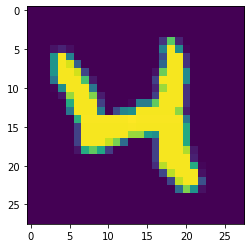

4


In [7]:
# displaying the image

plt.imshow(X_train[20])
plt.show()

# print the corresponding label
print(Y_train[20])

In [8]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
print(np.unique(X_train))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [11]:
print(np.unique(X_test))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [12]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [13]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# **BUILDING NEURAL NETWORK**

In [14]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [15]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0836 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0683 - accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0601 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0509 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0452 - accuracy: 0.9863
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0403 - accuracy: 0.9865
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0

**Training Accuracy Of 96%**

## **Accuracy Testing**

In [17]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1051 - accuracy: 0.9699
0.9699000120162964


**Test Data Accuracy = 96%**

In [18]:
print(X_test.shape)

(10000, 28, 28)


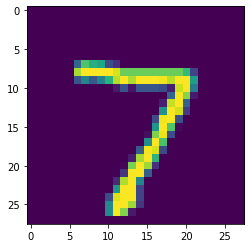

In [19]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

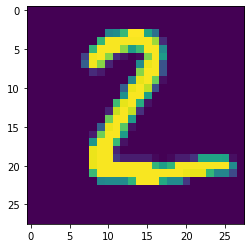

In [20]:
# Second data point in X_test
plt.imshow(X_test[1])
plt.show()

In [21]:
# First Data In Y_test
print(Y_test[0])

7


In [22]:
# Second Data In Y_test
print(Y_test[1])

2


In [23]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [24]:
print(Y_pred.shape)

(10000, 10)


In [25]:
print(Y_pred[0])

[1.4374391e-03 7.1467441e-01 6.1776555e-01 6.3362604e-01 1.2592117e-04
 8.9226983e-04 1.1089677e-08 9.9999857e-01 9.5946109e-03 6.5481454e-02]


In [26]:
print(Y_pred[1])

[8.1591361e-04 9.5978367e-01 9.9999821e-01 3.8847181e-01 1.8139371e-10
 1.2371724e-01 2.4493648e-01 6.6343847e-10 9.9698234e-01 2.4737842e-10]


In [27]:
# converting the prediction probabilities to class label

first_test_image_label = np.argmax(Y_pred[0])
print(first_test_image_label)

7


In [28]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

**Y_test  =  True labels**

**Y_pred_labels  =  Predicted Labels**

# **CONFUSION MATRIX**

In [29]:
conf_matrix = confusion_matrix(Y_test, Y_pred_labels)

In [30]:
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    0,    1,    1,    1,    2,    2,    3,    0],
       [   0, 1122,    0,    3,    0,    3,    2,    1,    4,    0],
       [   5,    1,  983,    7,    8,    2,    5,    8,   13,    0],
       [   0,    0,    2,  972,    0,   25,    0,    3,    4,    4],
       [   1,    0,    2,    0,  965,    3,    5,    1,    1,    4],
       [   2,    0,    0,    4,    1,  879,    3,    1,    2,    0],
       [   5,    3,    0,    1,    4,   10,  932,    0,    3,    0],
       [   1,    7,    6,    1,    5,    0,    0,  995,    7,    6],
       [   2,    0,    1,    6,    4,   14,    2,    3,  939,    3],
       [   2,    4,    0,    6,   26,   11,    2,    6,    9,  943]],
      dtype=int32)>

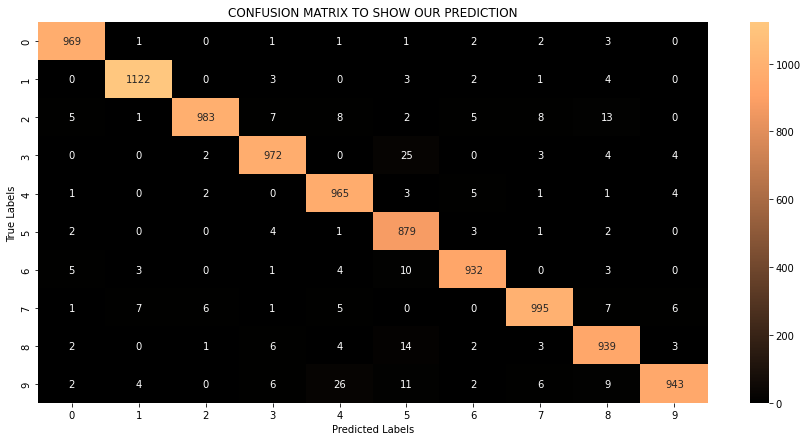

In [32]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='copper')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title("CONFUSION MATRIX TO SHOW OUR PREDICTION")
plt.show()

# **BUILDING A PREDICTIVE SYSTEM**

ENTER IMAGE PATH TO BE PREDICTED: /content/Digit.png
Predicted Image


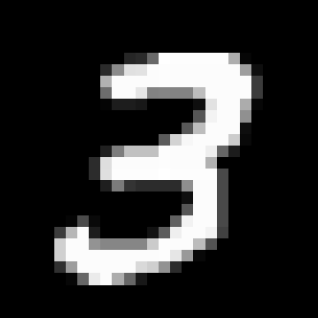

1/1 [==============================] - 0s 19ms/step
The Handwritten Digit is recognised as  3
The Image Is  3


In [45]:
input_image_path = input('ENTER IMAGE PATH TO BE PREDICTED: ')
print("Predicted Image")

def predictive():
  input_image = cv2.imread(input_image_path)
  cv2_imshow(input_image)

  grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

  input_image_resize = cv2.resize(grayscale, (28, 28))

  input_image_resize = input_image_resize/255

  image_reshaped = np.reshape(input_image_resize, [1,28,28])

  input_prediction = model.predict(image_reshaped)

  input_pred_label = np.argmax(input_prediction)

  print('The Handwritten Digit is recognised as ', input_pred_label)
  print("The Image Is ", input_pred_label)
predictive()


ENTER IMAGE PATH TO BE PREDICTED: /content/digit1.png
Predicted Image


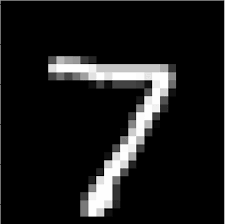

1/1 [==============================] - 0s 17ms/step
The Handwritten Digit is recognised as  7
The Image Is  7


In [46]:
input_image_path = input('ENTER IMAGE PATH TO BE PREDICTED: ')
print("Predicted Image")

def predictive():
  input_image = cv2.imread(input_image_path)
  cv2_imshow(input_image)

  grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

  input_image_resize = cv2.resize(grayscale, (28, 28))

  input_image_resize = input_image_resize/255

  image_reshaped = np.reshape(input_image_resize, [1,28,28])

  input_prediction = model.predict(image_reshaped)

  input_pred_label = np.argmax(input_prediction)

  print('The Handwritten Digit is recognised as ', input_pred_label)
  print("The Image Is ", input_pred_label)
predictive()


ENTER IMAGE PATH TO BE PREDICTED: /content/digit2.jpg
Predicted Image


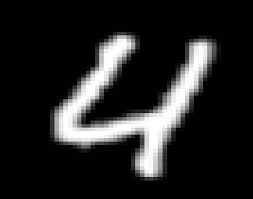

1/1 [==============================] - 0s 91ms/step
The Handwritten Digit is recognised as  4
The Image Is  4


In [47]:
input_image_path = input('ENTER IMAGE PATH TO BE PREDICTED: ')
print("Predicted Image")

def predictive():
  input_image = cv2.imread(input_image_path)
  cv2_imshow(input_image)

  grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

  input_image_resize = cv2.resize(grayscale, (28, 28))

  input_image_resize = input_image_resize/255

  image_reshaped = np.reshape(input_image_resize, [1,28,28])

  input_prediction = model.predict(image_reshaped)

  input_pred_label = np.argmax(input_prediction)

  print('The Handwritten Digit is recognised as ', input_pred_label)
  print("The Image Is ", input_pred_label)
predictive()


**NOTICE THAT WE BUILT A NEURAL NETWORK  THAT RECOGNIZE HANDWRITTEN DIGITS , AND IT HAS ACCURATELY RECOGNIZED 3 HANDWRITTEN DIGITS WITHOUT ERROR.**